In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 1. Park Data
## 1) Does offering of a promotion boost sales?

In [3]:
#load the data
data = pd.read_excel('park_data.xlsx')
data.head()

,Channel,Offer,Ticket
0,Post,Bundle,Pass
1,Offline,Bundle,Pass
2,Post,NoBundle,Pass
3,Offline,Bundle,NoPass
4,Offline,Bundle,Pass


In [4]:
data['Ticket'] = data['Ticket'].astype(str).map({'Pass':1,'NoPass':0})
data.head()

,Channel,Offer,Ticket
0,Post,Bundle,1
1,Offline,Bundle,1
2,Post,NoBundle,1
3,Offline,Bundle,0
4,Offline,Bundle,1


In [5]:
data['Offer'] = data['Offer'].astype(str).map({'Bundle':1,'NoBundle':0})
data.head()

,Channel,Offer,Ticket
0,Post,1,1
1,Offline,1,1
2,Post,0,1
3,Offline,1,0
4,Offline,1,1


In [6]:
feature = data['Offer']
output = data['Ticket']

In [30]:
model = sm.formula.glm("output ~ feature", data, family = sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                 3156
Model:                            GLM   Df Residuals:                     3154
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2172.7
Date:                Thu, 25 Mar 2021   Deviance:                       4345.4
Time:                        09:26:12   Pearson chi2:                 3.16e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1922      0.052     -3.683      0.0

In [33]:
model.params

Intercept   -0.192223
feature      0.388791
dtype: float64

In [34]:
# odds ratio
np.exp(model.params) # Given an offer, the likelihood of purchase increases by 1.47x 

Intercept    0.825123
feature      1.475196
dtype: float64

In [35]:
data.groupby(['Ticket']).count()

,Channel,Offer
Ticket,,
0,1567,1567
1,1589,1589


## 2) by Channels

In [216]:
data.groupby(['Ticket', 'Channel']).count()

Offer
Ticket Channel       
0      Email      568
       Offline    272
       Post       727
1      Email       65
       Offline    923
       Post       601

In [217]:
model2 = sm.formula.glm("data['Ticket'] ~ data['Offer']+data['Channel']", data, family = sm.families.Binomial()).fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         data['Ticket']   No. Observations:                 3156
Model:                            GLM   Df Residuals:                     3152
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1745.1
Date:                Wed, 24 Mar 2021   Deviance:                       3490.2
Time:                        17:07:27   Pearson chi2:                 3.30e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [219]:
# odds ratio
np.exp(model2.params) # decision boundary = 1. 

Intercept                      0.125105
data['Channel'][T.Offline]    41.337121
data['Channel'][T.Post]        8.812507
data['Offer']                  0.571085
dtype: float64

## 3) interact 

In [28]:
#load the data
data1 = pd.read_excel('park_data.xlsx')
print(data1.head())
print(data1.dtypes)


   Channel     Offer  Ticket
0     Post    Bundle    Pass
1  Offline    Bundle    Pass
2     Post  NoBundle    Pass
3  Offline    Bundle  NoPass
4  Offline    Bundle    Pass
Channel    object
Offer      object
Ticket     object
dtype: object


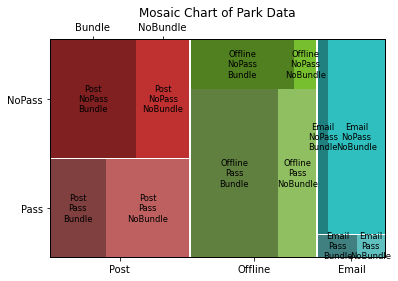

In [45]:
# Package for plot
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# checking interaction effect
mosaic(data1, ['Channel', 'Ticket', 'Offer'], title='Mosaic Chart of Park Data')
plt.show() 

In [20]:
model3 = sm.formula.glm("data['Ticket'] ~ data['Offer']*data['Channel']", data, family = sm.families.Binomial()).fit()
print(model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         data['Ticket']   No. Observations:                 3156
Model:                            GLM   Df Residuals:                     3150
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1696.8
Date:                Thu, 25 Mar 2021   Deviance:                       3393.5
Time:                        08:50:21   Pearson chi2:                 3.16e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [21]:
# odds ratio
np.exp(model3.params) # decision boundary = 1. 

Intercept                                     0.055670
data['Channel'][T.Offline]                  104.111867
data['Channel'][T.Post]                      23.196776
data['Offer']                                 8.224007
data['Offer']:data['Channel'][T.Offline]      0.060116
data['Offer']:data['Channel'][T.Post]         0.050750
dtype: float64

# 2. E-commerce Data

In [59]:
import pandas as pd
import numpy as np

# load data
data = pd.read_csv("https://goo.gl/4Akgkt")

data.head()

,acctAge,visitsMonth,spendToDate,spendMonth,satSite,satQuality,satPrice,satOverall,region,coupon,purchase
0,21,9,21,21,6,5,6,6,Mideast,0,0
1,9,9,55,55,4,5,4,4,Southwest,0,0
2,16,7,64,17,6,6,7,7,Mideast,1,0
3,4,8,61,8,6,6,6,6,Southwest,1,0
4,16,6,27,9,5,5,6,6,Midwest,0,0


In [56]:
data.describe()

,acctAge,visitsMonth,spendToDate,spendMonth,satSite,satQuality,satPrice,satOverall,coupon,purchase
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,12.835928,7.180838,125.943713,34.200000,5.714970,6.010778,5.756886,5.695808,0.338922,0.031138
std,5.778539,2.233303,203.160745,66.813617,1.532291,1.608171,1.601726,1.647880,0.473627,0.173794
min,1.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,8.000000,6.000000,28.000000,9.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000
50%,13.000000,7.000000,45.000000,17.000000,6.000000,6.000000,6.000000,6.000000,0.000000,0.000000
75%,18.000000,9.000000,100.500000,34.000000,7.000000,7.000000,7.000000,7.000000,1.000000,0.000000
max,24.000000,15.000000,1196.000000,1041.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000


## 1) Purchase ~ Coupon

In [50]:
import statsmodels.api as sm

model = sm.formula.glm('purchase ~ coupon', data, family = sm.families.Binomial()).fit()
print(model.summary())
print(np.exp(model.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               purchase   No. Observations:                  835
Model:                            GLM   Df Residuals:                      833
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.20
Date:                Thu, 25 Mar 2021   Deviance:                       214.39
Time:                        13:08:45   Pearson chi2:                     835.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3549      0.380    -11.449      0.0

In [54]:
model2 = sm.formula.glm('purchase ~ coupon + region + satOverall + spendToDate', data, family = sm.families.Binomial()).fit()
print(model2.summary())
print(np.exp(model2.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               purchase   No. Observations:                  835
Model:                            GLM   Df Residuals:                      825
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -95.013
Date:                Thu, 25 Mar 2021   Deviance:                       190.03
Time:                        13:11:23   Pearson chi2:                     805.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -7.9858    

In [55]:
model3 = sm.formula.glm('purchase ~ coupon + satOverall + coupon:satOverall', data, family = sm.families.Binomial()).fit()
print(model3.summary())
print(np.exp(model3.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               purchase   No. Observations:                  835
Model:                            GLM   Df Residuals:                      831
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.703
Date:                Thu, 25 Mar 2021   Deviance:                       193.41
Time:                        13:12:08   Pearson chi2:                     740.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -8.0012      1.89

In [61]:
model4 = sm.formula.glm('purchase ~ coupon + satOverall', data, family = sm.families.Binomial()).fit()
print(model4.summary())
print(np.exp(model4.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               purchase   No. Observations:                  835
Model:                            GLM   Df Residuals:                      832
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.705
Date:                Thu, 25 Mar 2021   Deviance:                       193.41
Time:                        13:56:34   Pearson chi2:                     747.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0793      1.027     -7.867      0.0